In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load sheets
heat_df = pd.read_excel("/content/GRADE_PRODUCT_MIX.xlsx", sheet_name="HEAT_MASTER")
grade_df = pd.read_excel("/content/GRADE_PRODUCT_MIX.xlsx", sheet_name="GRADE_MASTER")

# Merge on Grade (FK → PK)
merged_df = pd.merge(heat_df, grade_df, on='GRADE', how='left')


# ***`UNIVARIANT ANAlYSIS`***

/tmp/ipython-input-2831103479.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_grades.index, y=top_grades.values, palette='crest')


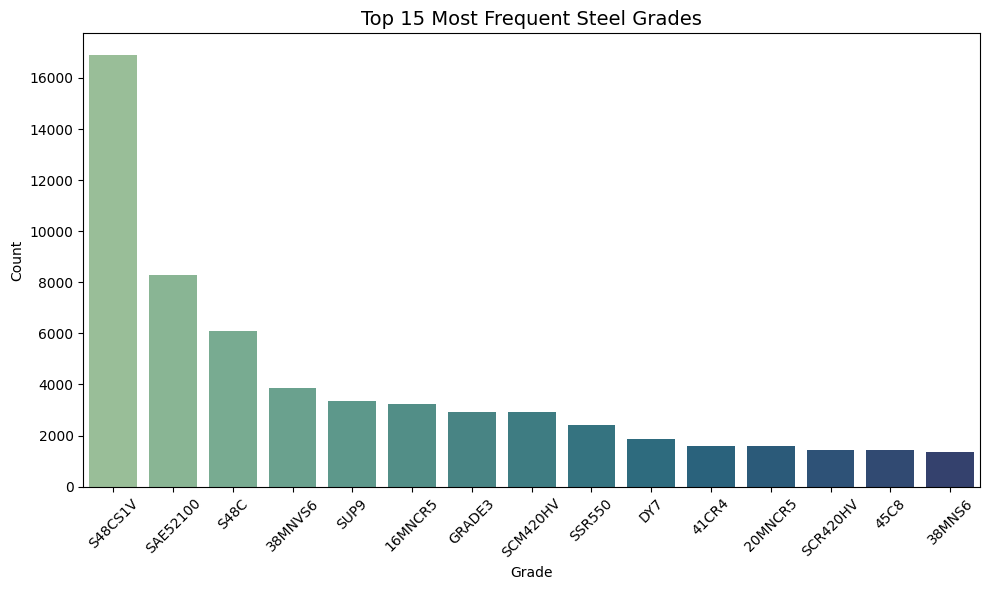

In [3]:
# GRADE — Frequency Distribution
# Goal: See which steel grades are most common.
plt.figure(figsize=(10,6))
top_grades = merged_df['GRADE'].value_counts().head(15)
sns.barplot(x=top_grades.index, y=top_grades.values, palette='crest')
plt.title("Top 15 Most Frequent Steel Grades", fontsize=14)
plt.xlabel("Grade")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


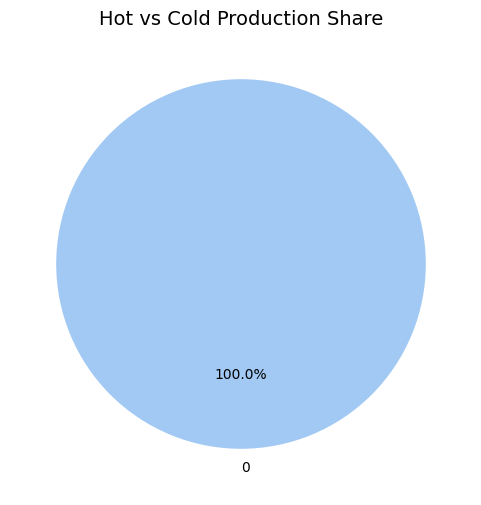

In [4]:
# HOT_COLD — Production Type Mix
# Goal: See share of hot vs cold production.
plt.figure(figsize=(6,6))
merged_df['HOT_COLD'].value_counts().plot.pie(
    autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90
)
plt.title("Hot vs Cold Production Share", fontsize=14)
plt.ylabel("")
plt.show()


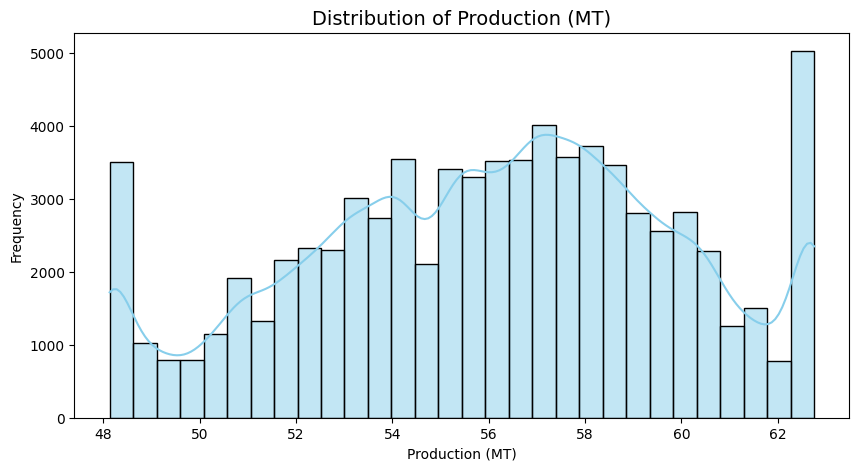

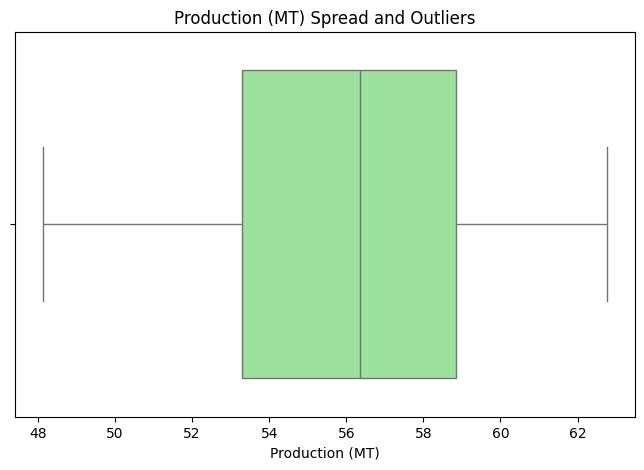

In [5]:
# Production (MT) — Distribution
# Goal: Understand average production and outliers.
plt.figure(figsize=(10,5))
sns.histplot(merged_df['Production (MT)'], kde=True, color='skyblue', bins=30)
plt.title("Distribution of Production (MT)", fontsize=14)
plt.xlabel("Production (MT)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=merged_df['Production (MT)'], color='lightgreen')
plt.title("Production (MT) Spread and Outliers")
plt.xlabel("Production (MT)")
plt.show()


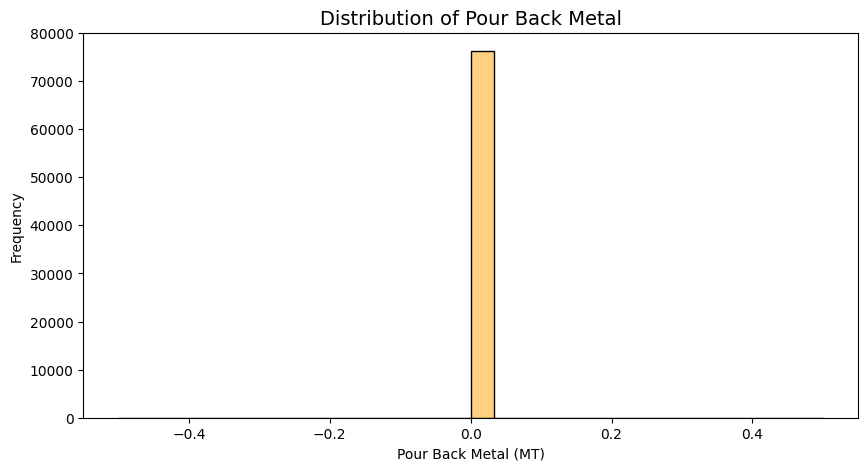

In [6]:
# Pour_Back_Metal — Process Recovery
# Goal: See how much metal is poured back on average.
plt.figure(figsize=(10,5))
sns.histplot(merged_df['Pour_Back_Metal'], kde=True, bins=30, color='orange')
plt.title("Distribution of Pour Back Metal", fontsize=14)
plt.xlabel("Pour Back Metal (MT)")
plt.ylabel("Frequency")
plt.show()


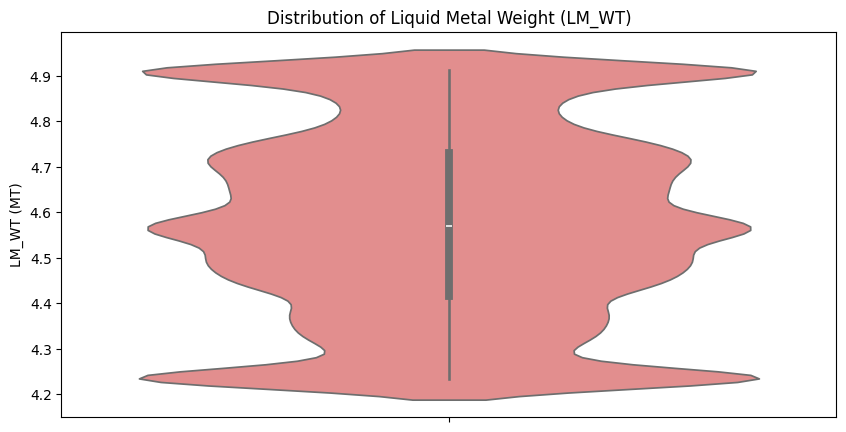

In [7]:
# LM_WT — Liquid Metal Weight Distribution
# Goal: Variation in metal weight per heat.
plt.figure(figsize=(10,5))
sns.violinplot(y='LM_WT', data=merged_df, color='lightcoral')
plt.title("Distribution of Liquid Metal Weight (LM_WT)")
plt.ylabel("LM_WT (MT)")
plt.show()


/tmp/ipython-input-3652185239.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=section_counts.index, y=section_counts.values, palette='cool')


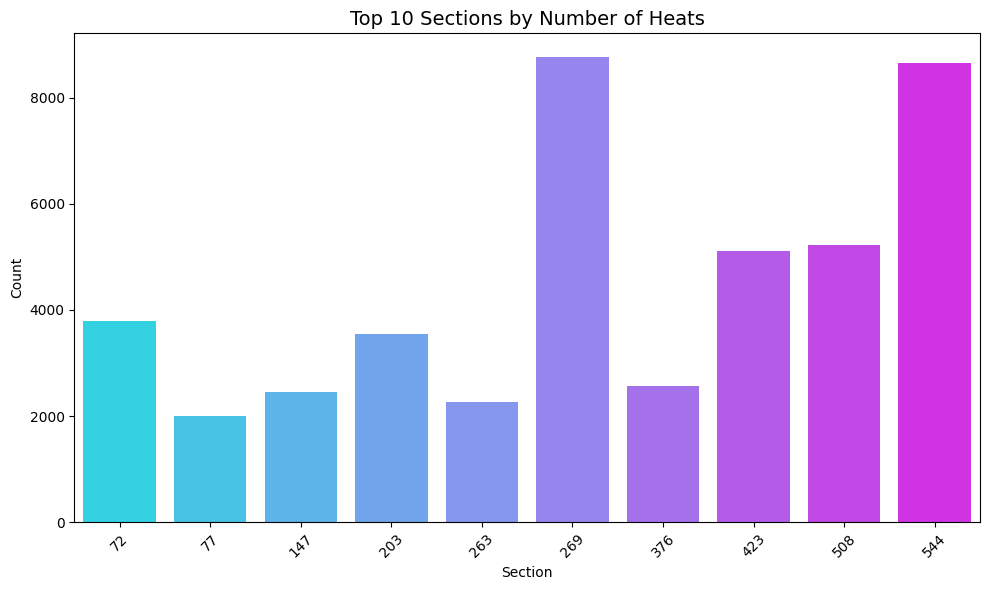

In [8]:
# SECTION — Production by Section
# Goal: Identify which section contributes most.
plt.figure(figsize=(10,6))
section_counts = merged_df['SECTION'].value_counts().head(10)
sns.barplot(x=section_counts.index, y=section_counts.values, palette='cool')
plt.title("Top 10 Sections by Number of Heats", fontsize=14)
plt.xlabel("Section")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1748194203.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SEN_OPEN', data=merged_df, palette='Set2')


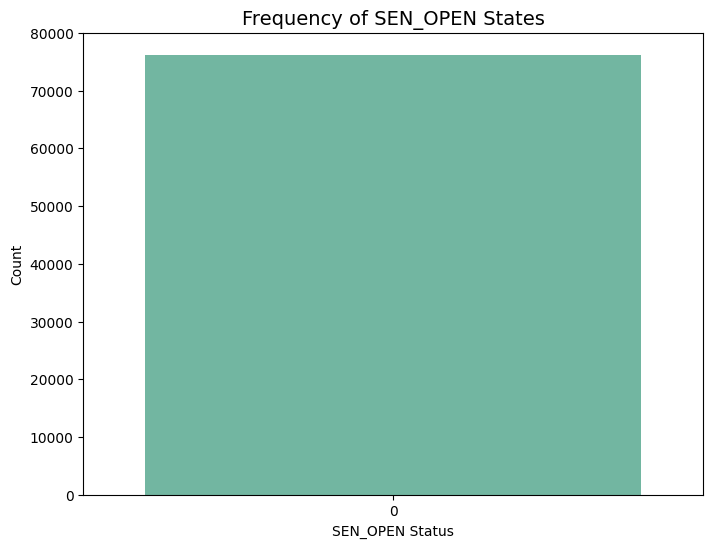

In [9]:
# SEN_OPEN — Operational Frequency
# Goal: Check if SEN openings are consistent.
plt.figure(figsize=(8,6))
sns.countplot(x='SEN_OPEN', data=merged_df, palette='Set2')
plt.title("Frequency of SEN_OPEN States", fontsize=14)
plt.xlabel("SEN_OPEN Status")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-3989999945.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SECTION_IC', data=merged_df, palette='viridis')


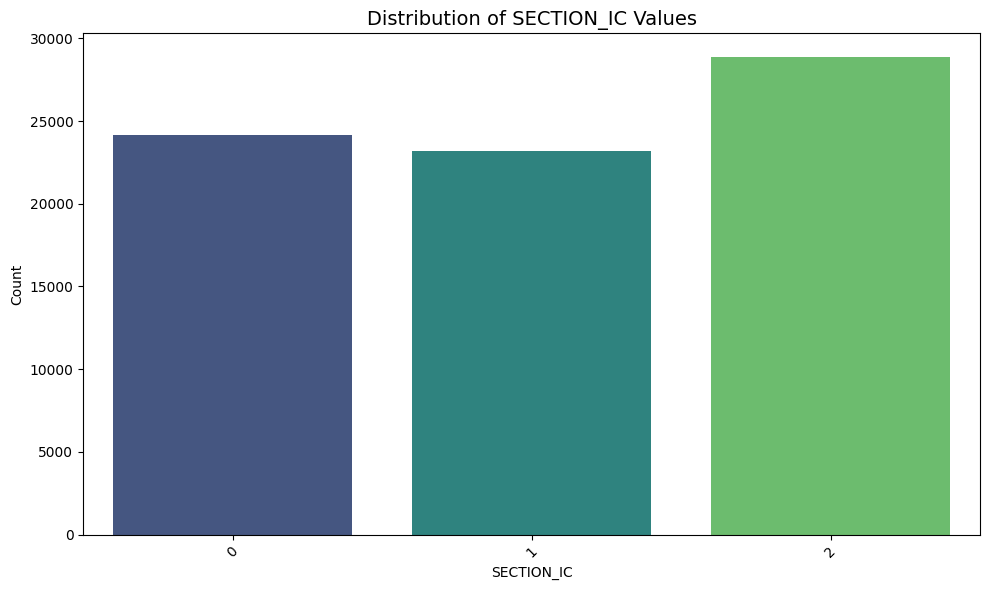

In [10]:
# SECTION_IC — Frequency Distribution

# Goal: Understand variation in internal code or section index.
plt.figure(figsize=(10,6))
sns.countplot(x='SECTION_IC', data=merged_df, palette='viridis')
plt.title("Distribution of SECTION_IC Values", fontsize=14)
plt.xlabel("SECTION_IC")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ***`Bivariate Analysis`***

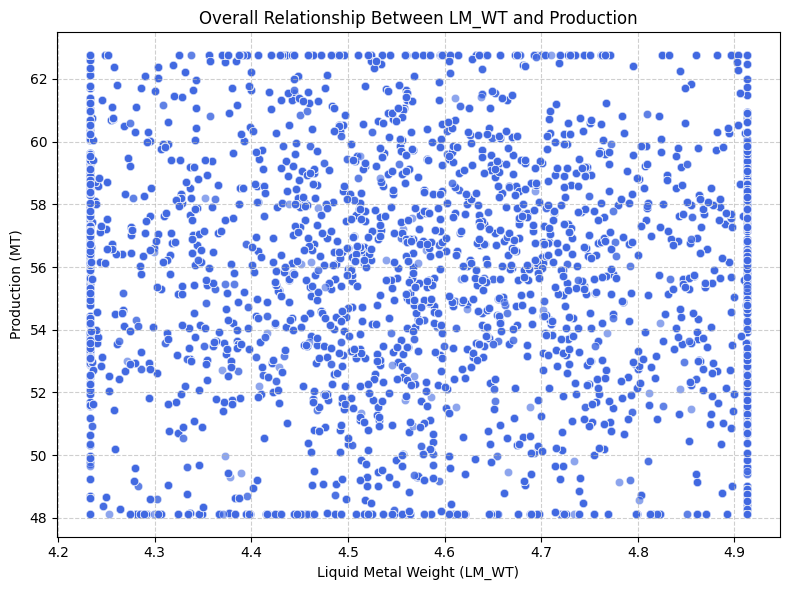

In [11]:

#LM_WT vs Production (MT)


plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_df, x='LM_WT', y='Production (MT)', color='royalblue', alpha=0.6)
plt.title("Overall Relationship Between LM_WT and Production")
plt.xlabel("Liquid Metal Weight (LM_WT)")
plt.ylabel("Production (MT)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()







/tmp/ipython-input-939156510.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='HOT_COLD', y='Production (MT)', palette='mako')


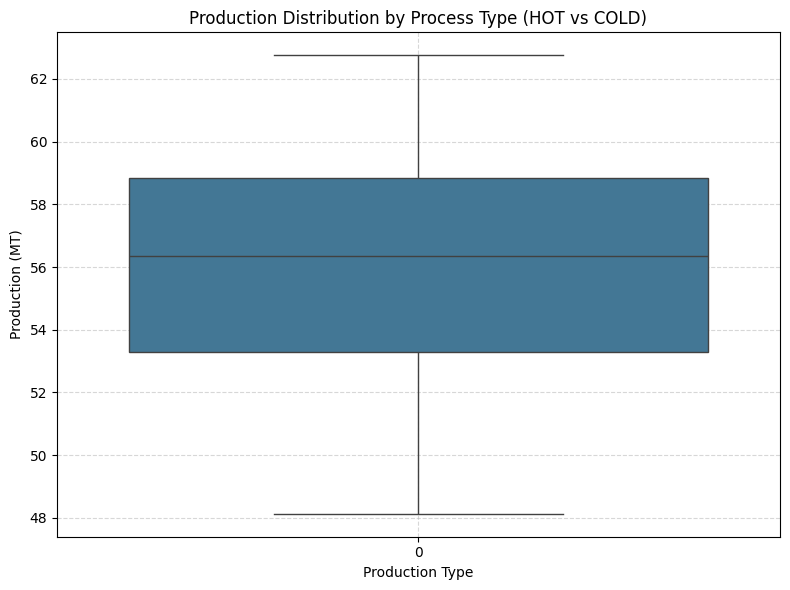

In [12]:

#  HOT_COLD vs Production (MT)

plt.figure(figsize=(8,6))
sns.boxplot(data=merged_df, x='HOT_COLD', y='Production (MT)', palette='mako')
plt.title("Production Distribution by Process Type (HOT vs COLD)")
plt.xlabel("Production Type")
plt.ylabel("Production (MT)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3719066492.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=section_prod.index, y=section_prod.values, palette='viridis')


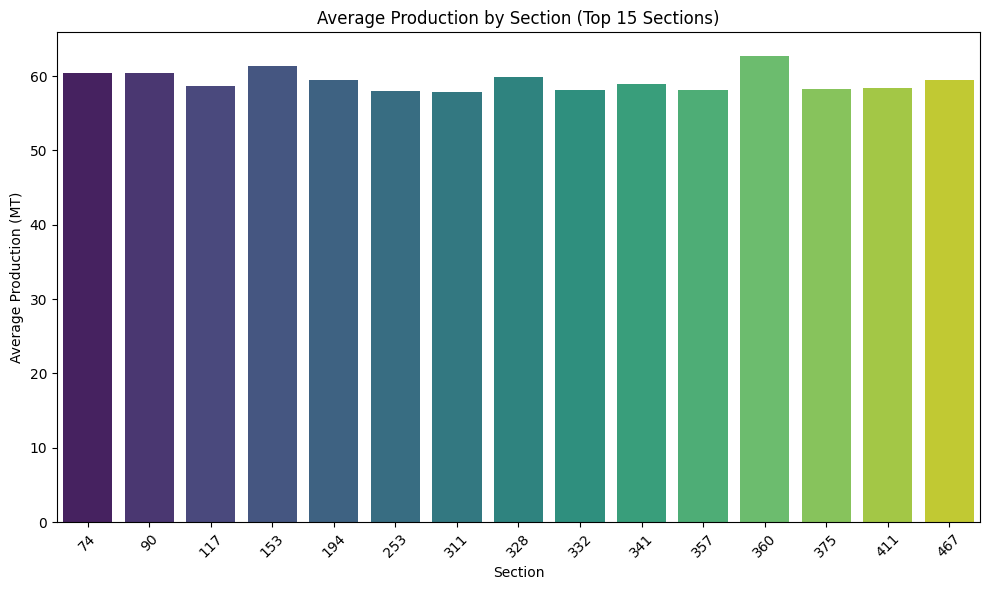

In [13]:


# SECTION vs Production (MT)

section_prod = merged_df.groupby('SECTION')['Production (MT)'].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(10,6))
sns.barplot(x=section_prod.index, y=section_prod.values, palette='viridis')
plt.title("Average Production by Section (Top 15 Sections)")
plt.xlabel("Section")
plt.ylabel("Average Production (MT)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

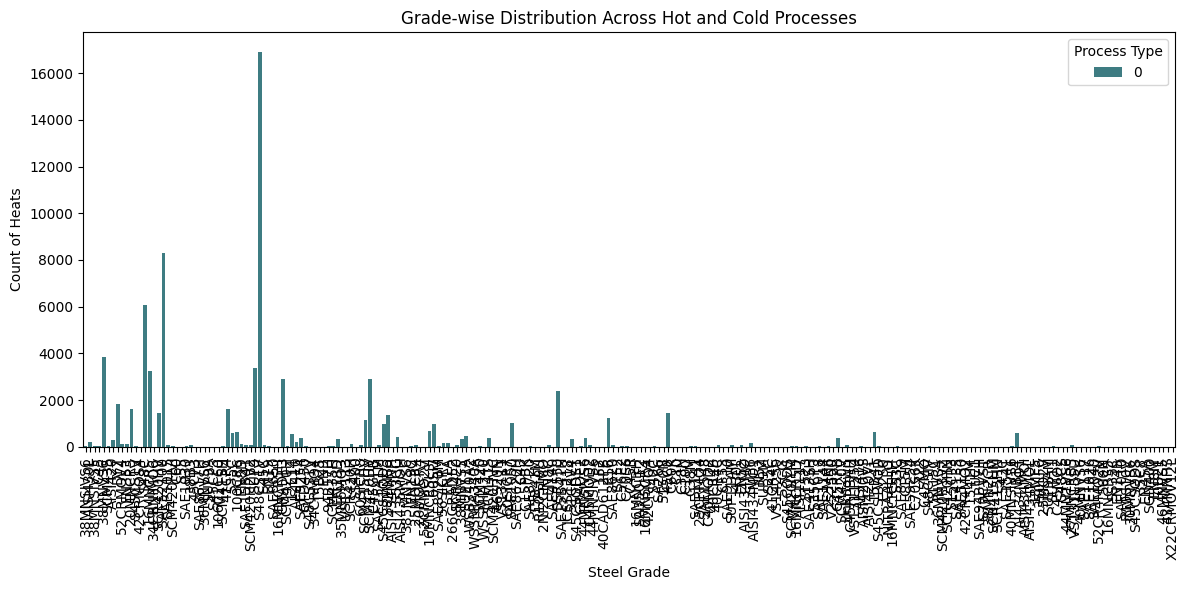

In [14]:


#  GRADE vs HOT_COLD (Categorical Relationship)

plt.figure(figsize=(12,6))
sns.countplot(data=merged_df, x='GRADE', hue='HOT_COLD', palette='crest')
plt.title("Grade-wise Distribution Across Hot and Cold Processes")
plt.xlabel("Steel Grade")
plt.ylabel("Count of Heats")
plt.xticks(rotation=90)
plt.legend(title='Process Type')
plt.tight_layout()
plt.show()


/tmp/ipython-input-3578697660.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_df, x='SEN_OPEN', y='Production (MT)', palette='coolwarm')


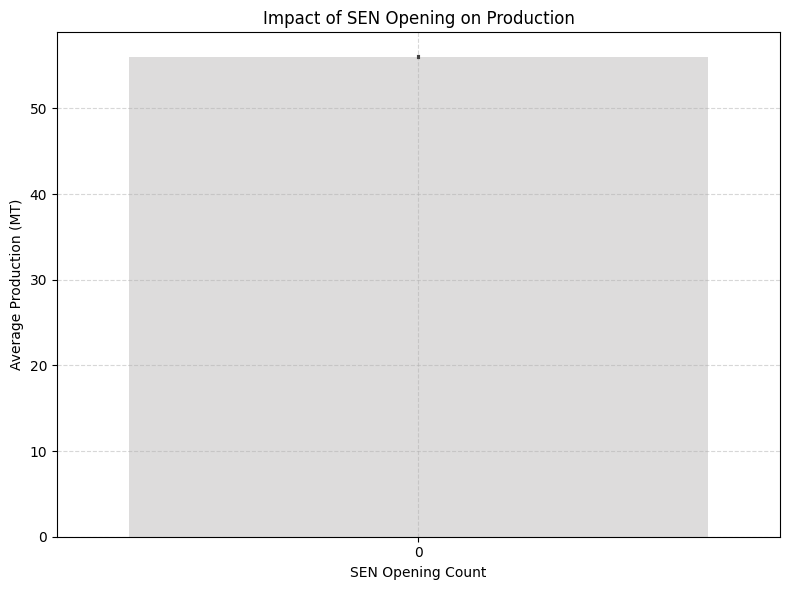

In [16]:

#  SEN_OPEN vs Production (MT)

plt.figure(figsize=(8,6))
sns.barplot(data=merged_df, x='SEN_OPEN', y='Production (MT)', palette='coolwarm')
plt.title("Impact of SEN Opening on Production")
plt.xlabel("SEN Opening Count")
plt.ylabel("Average Production (MT)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



/tmp/ipython-input-3155063354.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='SECTION_IC', y='Production (MT)', palette='crest')


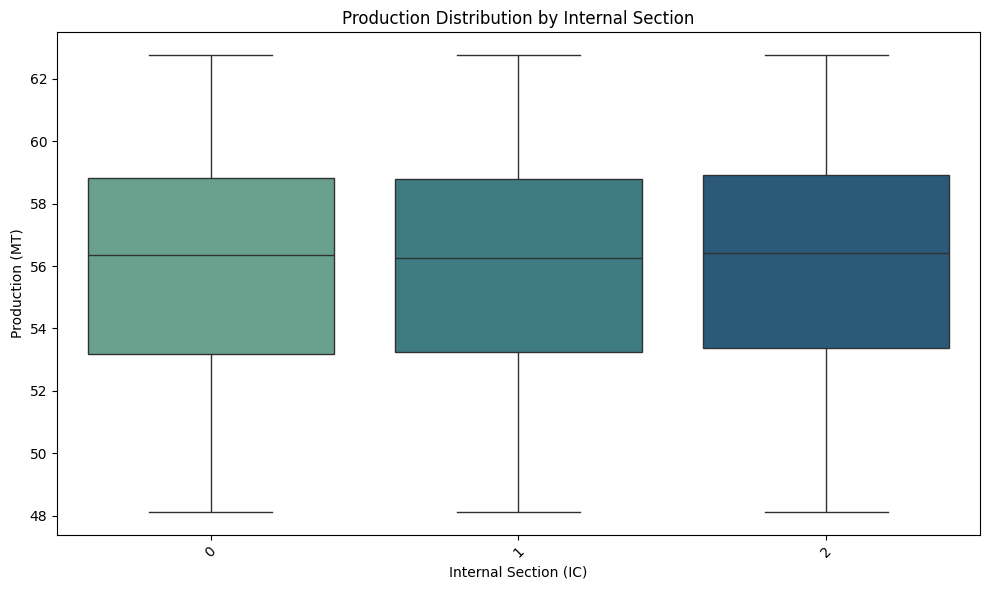

/tmp/ipython-input-3155063354.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_prod, x='SECTION_IC', y='Production (MT)', palette='crest')


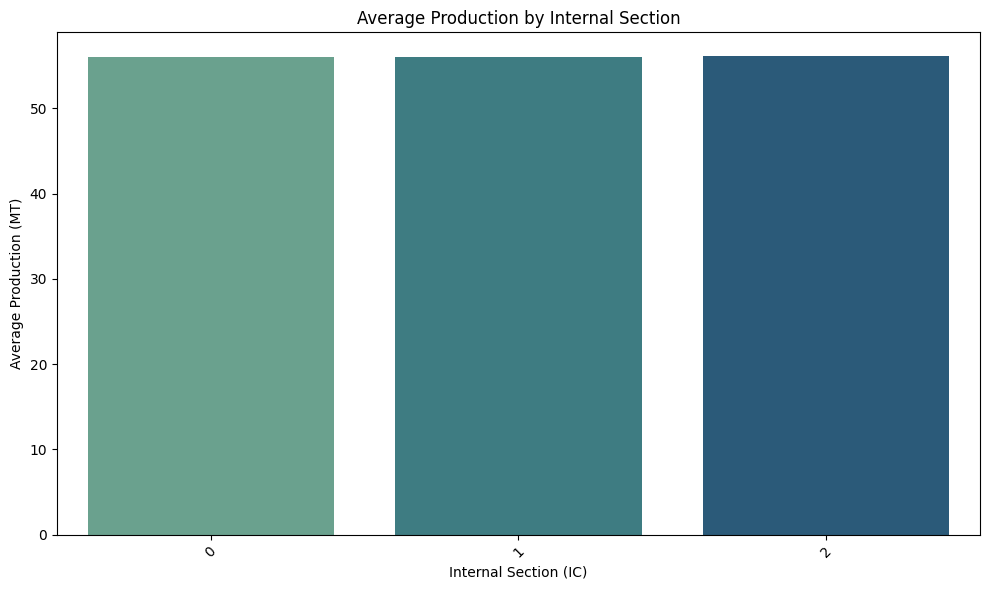

In [22]:

#SECTION_IC vs Production (MT)

plt.figure(figsize=(10,6))
sns.boxplot(data=merged_df, x='SECTION_IC', y='Production (MT)', palette='crest')
plt.title("Production Distribution by Internal Section")
plt.xlabel("Internal Section (IC)")
plt.ylabel("Production (MT)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
avg_prod = merged_df.groupby('SECTION_IC')['Production (MT)'].mean().reset_index()

sns.barplot(data=avg_prod, x='SECTION_IC', y='Production (MT)', palette='crest')
plt.title("Average Production by Internal Section")
plt.xlabel("Internal Section (IC)")
plt.ylabel("Average Production (MT)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3286894681.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


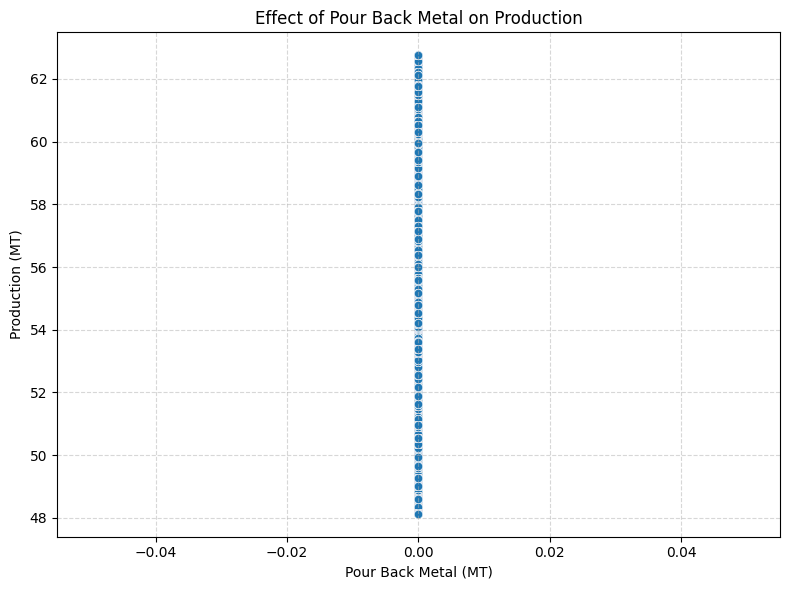

In [30]:

# Pour_Back_Metal vs Production (MT)


plt.figure(figsize=(8,6))
sns.scatterplot(
    data=merged_df,
    x='Pour_Back_Metal',
    y='Production (MT)',

    palette='magma',
    alpha=0.7
)

plt.title("Effect of Pour Back Metal on Production")
plt.xlabel("Pour Back Metal (MT)")
plt.ylabel("Production (MT)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


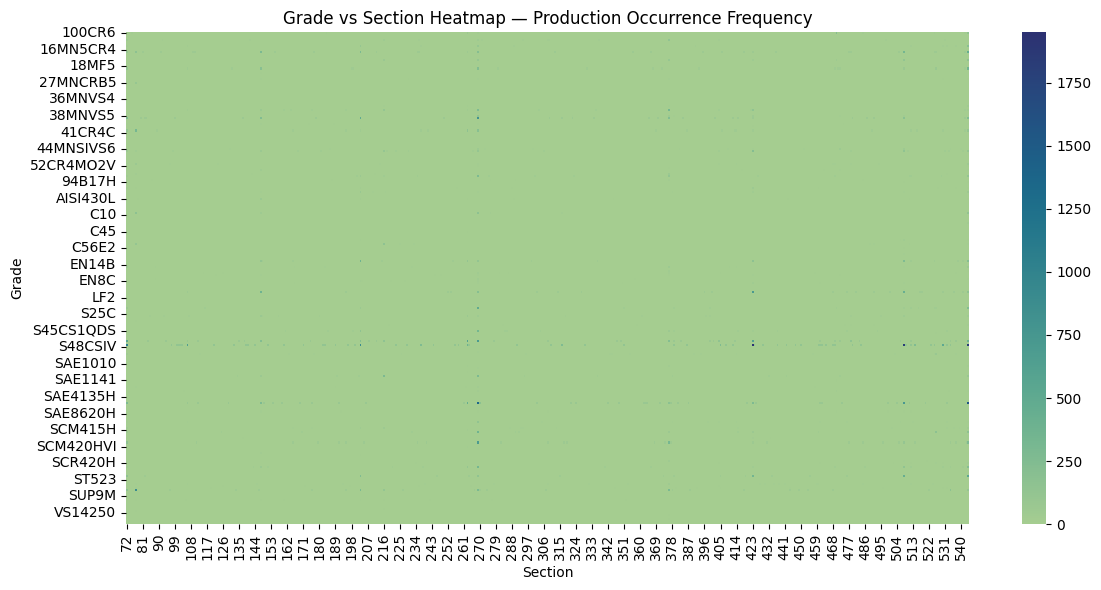

In [23]:

# GRADE vs SECTION (Heatmap)
grade_section = pd.crosstab(merged_df['GRADE'], merged_df['SECTION'])
plt.figure(figsize=(12,6))
sns.heatmap(grade_section, cmap='crest', cbar=True)
plt.title("Grade vs Section Heatmap — Production Occurrence Frequency")
plt.xlabel("Section")
plt.ylabel("Grade")
plt.tight_layout()
plt.show()

/tmp/ipython-input-881170174.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_grades, x='GRADE', y='Production (MT)', palette='crest')


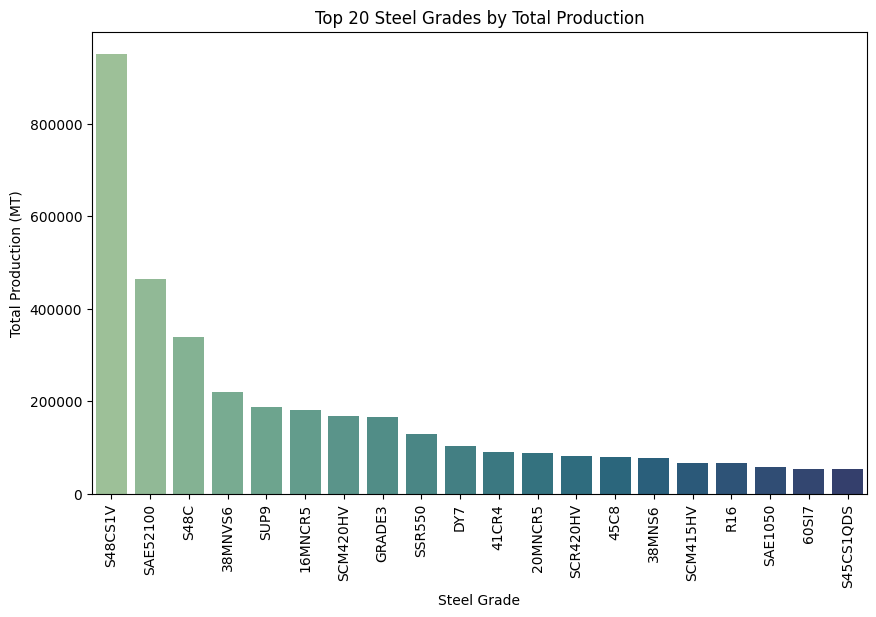

In [25]:
# Grade-wise Production Analysis
top_grades = merged_df.groupby('GRADE')['Production (MT)'].sum().nlargest(20).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=top_grades, x='GRADE', y='Production (MT)', palette='crest')
plt.title("Top 20 Steel Grades by Total Production")
plt.xlabel("Steel Grade")
plt.ylabel("Total Production (MT)")
plt.xticks(rotation=90)
plt.show()


/tmp/ipython-input-292851819.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grade_summary, x='GRADE', y='Production (MT)', palette='crest')


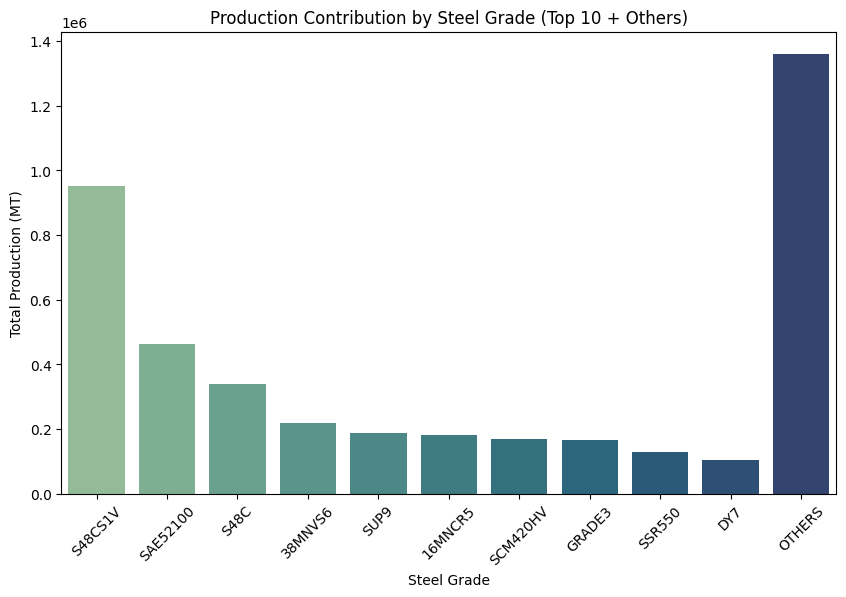

In [26]:
import matplotlib.pyplot as plt

# Replace column name if necessary
grade_totals = merged_df.groupby('GRADE')['Production (MT)'].sum().sort_values(ascending=False)

# Top 10 grades
top10 = grade_totals.head(10)

# Combine the rest as "OTHERS"
others = grade_totals[10:].sum()

# Use concat instead of append
grade_summary = pd.concat([top10, pd.Series({'OTHERS': others})]).reset_index()

# Rename columns for plotting clarity
grade_summary.columns = ['GRADE', 'Production (MT)']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=grade_summary, x='GRADE', y='Production (MT)', palette='crest')
plt.title("Production Contribution by Steel Grade (Top 10 + Others)")
plt.xlabel("Steel Grade")
plt.ylabel("Total Production (MT)")
plt.xticks(rotation=45)
plt.show()



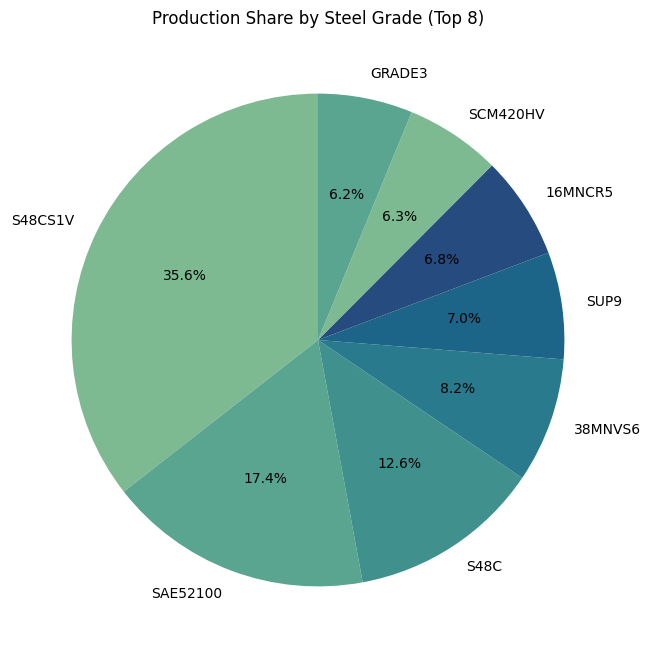

In [27]:
# Product Mix Contribution
grade_share = merged_df.groupby('GRADE')['Production (MT)'].sum().nlargest(8)

plt.figure(figsize=(8,8))
plt.pie(grade_share, labels=grade_share.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('crest'))
plt.title("Production Share by Steel Grade (Top 8)")
plt.show()


/tmp/ipython-input-3146541654.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='GRADE', y='LM_WT', palette='mako')


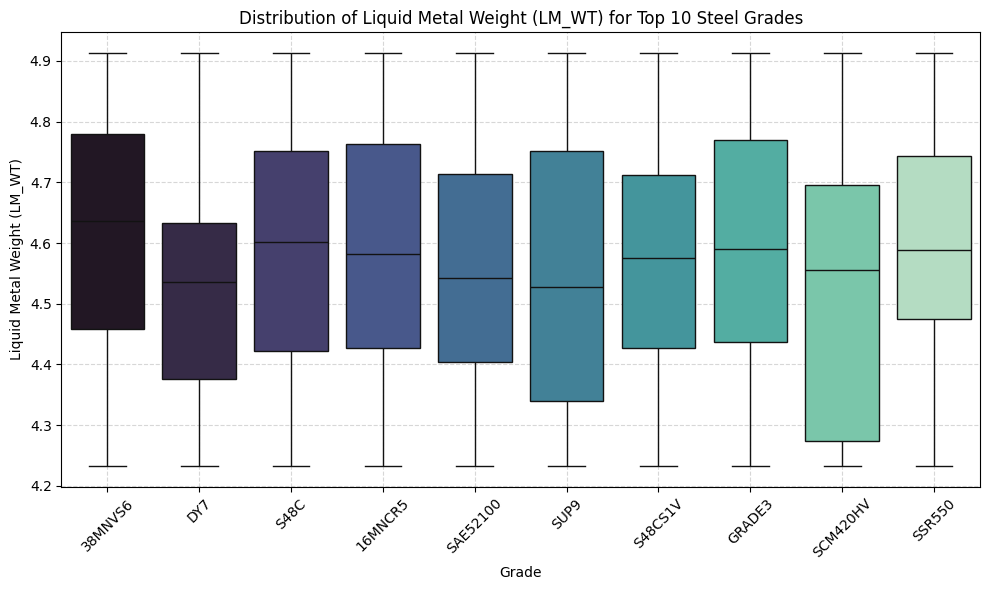

In [28]:
# Grade vs LM_WT (Liquid Metal Weight)
# Step 1: Find top 10 grades by total production
top_grades = (
    merged_df.groupby('GRADE')['Production (MT)']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Step 2: Filter dataset
filtered_df = merged_df[merged_df['GRADE'].isin(top_grades)]

# Step 3: Plot boxplot for only top 10 grades
plt.figure(figsize=(10,6))
sns.boxplot(data=filtered_df, x='GRADE', y='LM_WT', palette='mako')
plt.title("Distribution of Liquid Metal Weight (LM_WT) for Top 10 Steel Grades")
plt.xlabel("Grade")
plt.ylabel("Liquid Metal Weight (LM_WT)")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1156956599.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_df, x='GRADE', y='LM_WT', palette='mako', inner='quartile')


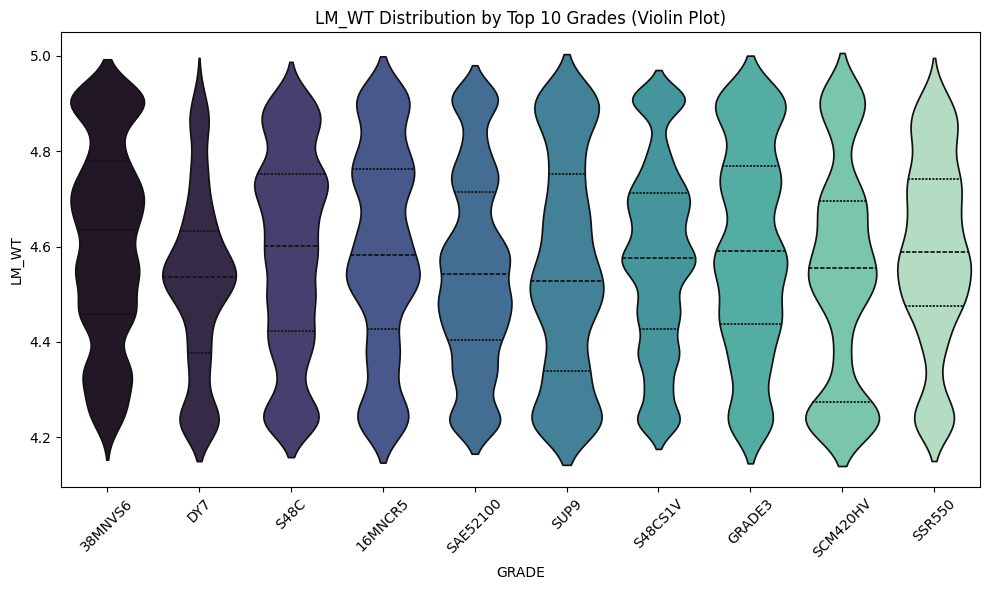

In [31]:
plt.figure(figsize=(10,6))
sns.violinplot(data=filtered_df, x='GRADE', y='LM_WT', palette='mako', inner='quartile')
plt.title("LM_WT Distribution by Top 10 Grades (Violin Plot)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


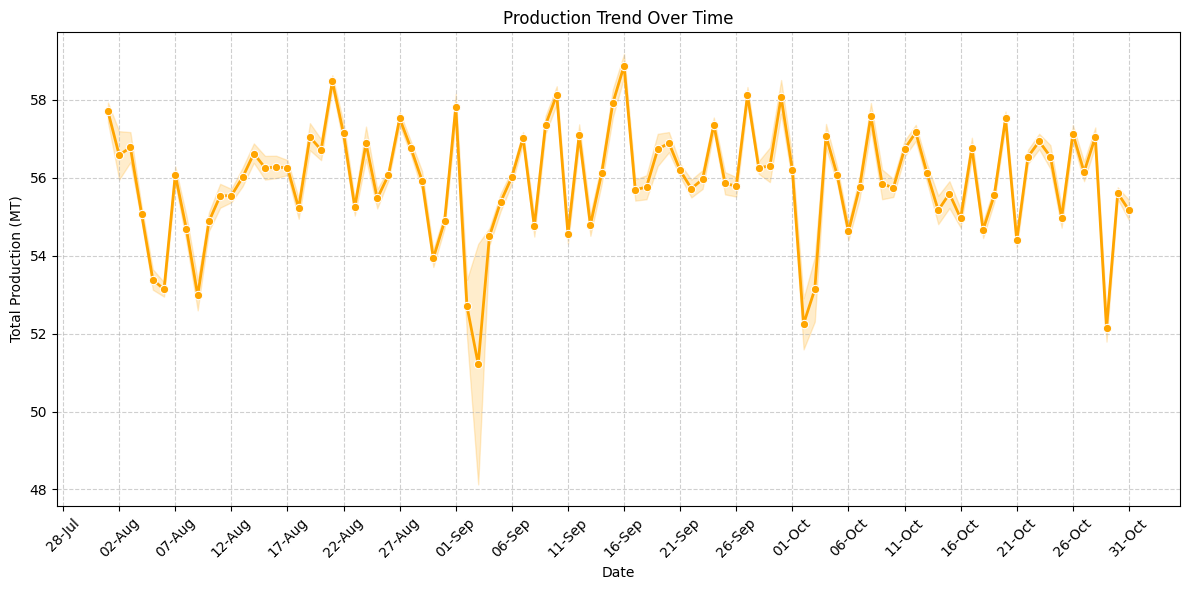

In [32]:
# Production Trend Over Time
import matplotlib.dates as mdates

plt.figure(figsize=(12,6))
sns.lineplot(data=merged_df, x='DATETIME', y='Production (MT)', marker='o', linewidth=2, color='orange')

plt.title("Production Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Production (MT)")

# ✅ Force date ticks every 5 days
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))

plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ***`Multi variant analysis`***

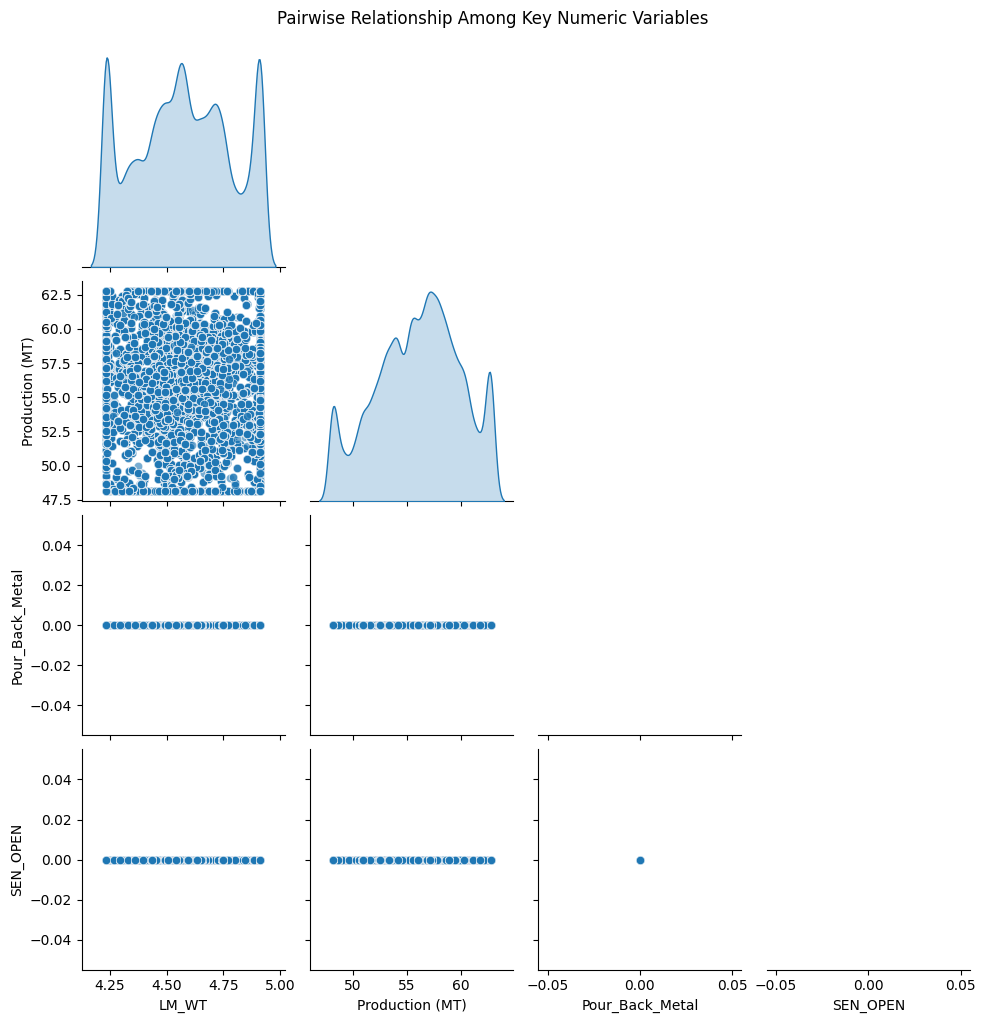

In [36]:
num_cols = ['LM_WT', 'Production (MT)', 'Pour_Back_Metal', 'SEN_OPEN']
sns.pairplot(merged_df[num_cols], diag_kind='kde', corner=True, plot_kws={'alpha':0.6})
plt.suptitle("Pairwise Relationship Among Key Numeric Variables", y=1.02)
plt.show()


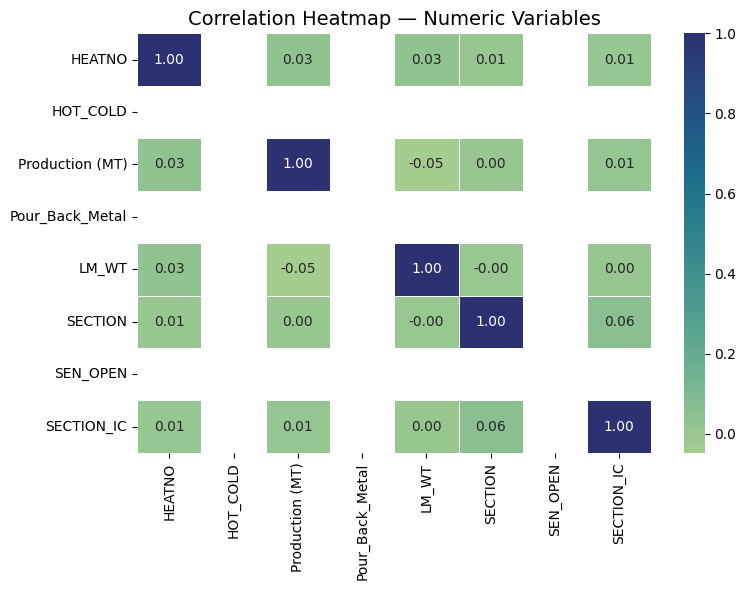

In [45]:
plt.figure(figsize=(8,6))
sns.heatmap(
    merged_df.corr(numeric_only=True),
    annot=True,
    cmap='crest',
    fmt='.2f',
    cbar=True,
    linewidths=0.5
)
plt.title("Correlation Heatmap — Numeric Variables", fontsize=14)
plt.tight_layout()
plt.show()





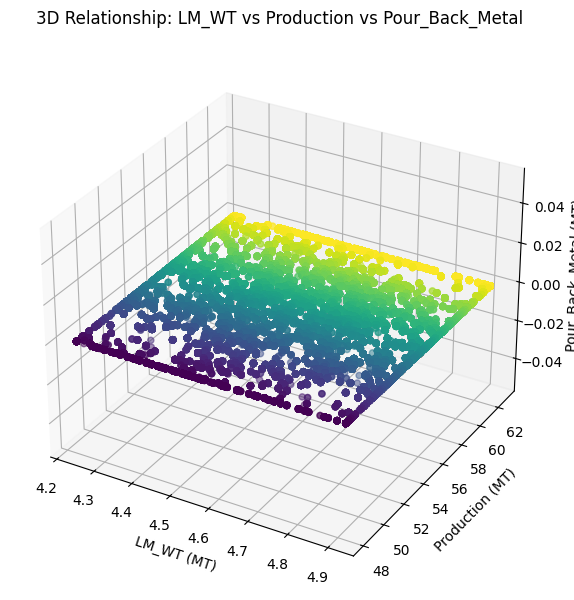

In [43]:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Filter to remove zeros for visibility
filtered = merged_df[(merged_df['LM_WT'] > 0) & (merged_df['Production (MT)'] > 0)]

ax.scatter(
    filtered['LM_WT'],
    filtered['Production (MT)'],
    filtered['Pour_Back_Metal'],
    c=filtered['Production (MT)'],
    cmap='viridis',
    alpha=0.5,
    s=20
)

ax.set_xlabel("LM_WT (MT)")
ax.set_ylabel("Production (MT)")
ax.set_zlabel("Pour_Back_Metal (MT)")
ax.set_title("3D Relationship: LM_WT vs Production vs Pour_Back_Metal", pad=20)
plt.show()

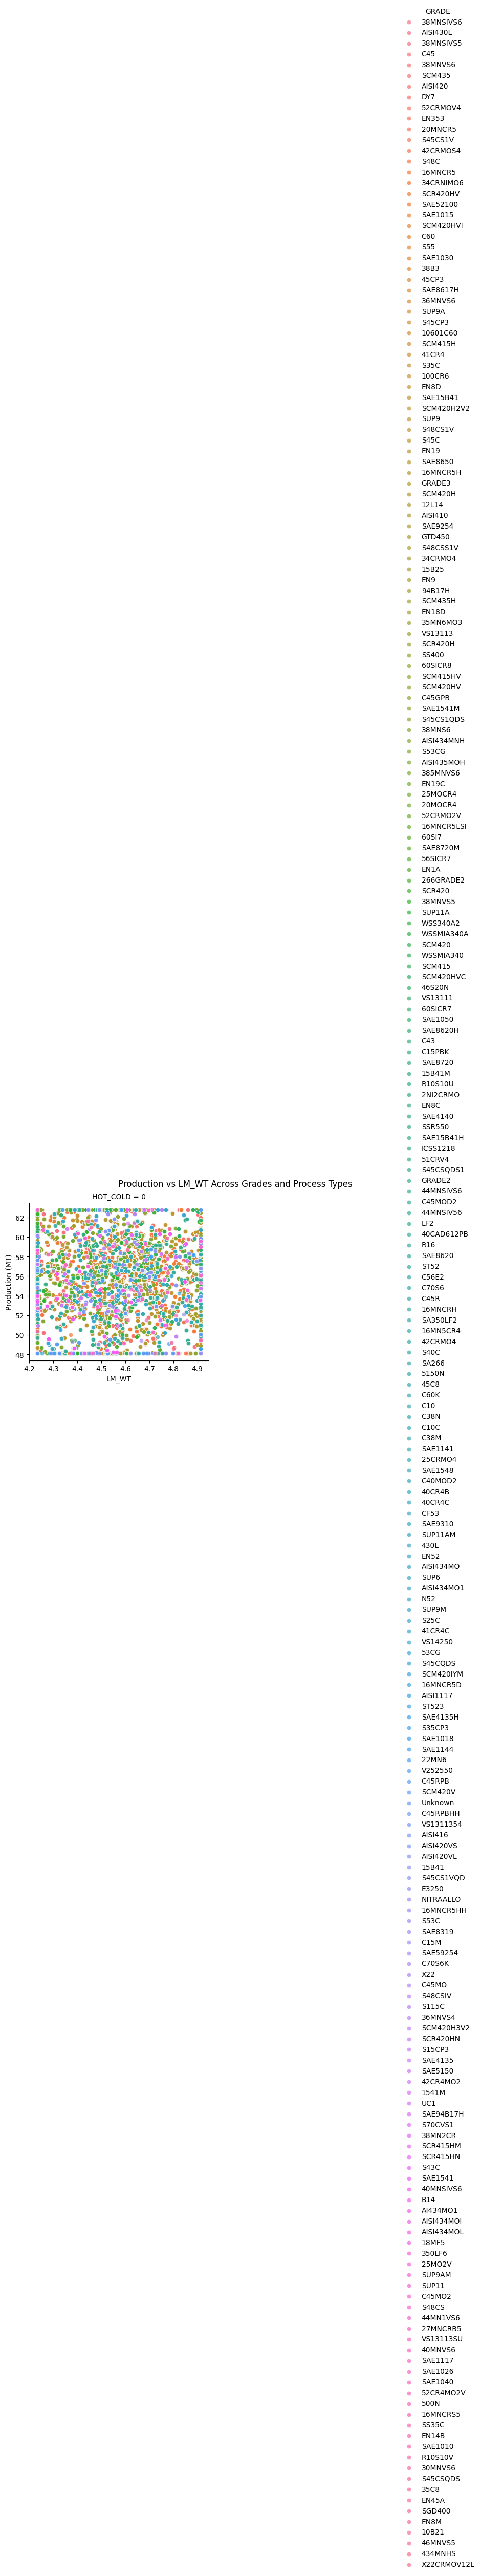

In [39]:
g = sns.FacetGrid(merged_df, col='HOT_COLD', hue='GRADE', col_wrap=2, height=4)
g.map(sns.scatterplot, 'LM_WT', 'Production (MT)', alpha=0.7)
g.add_legend()
g.fig.suptitle("Production vs LM_WT Across Grades and Process Types", y=1.03)
plt.show()


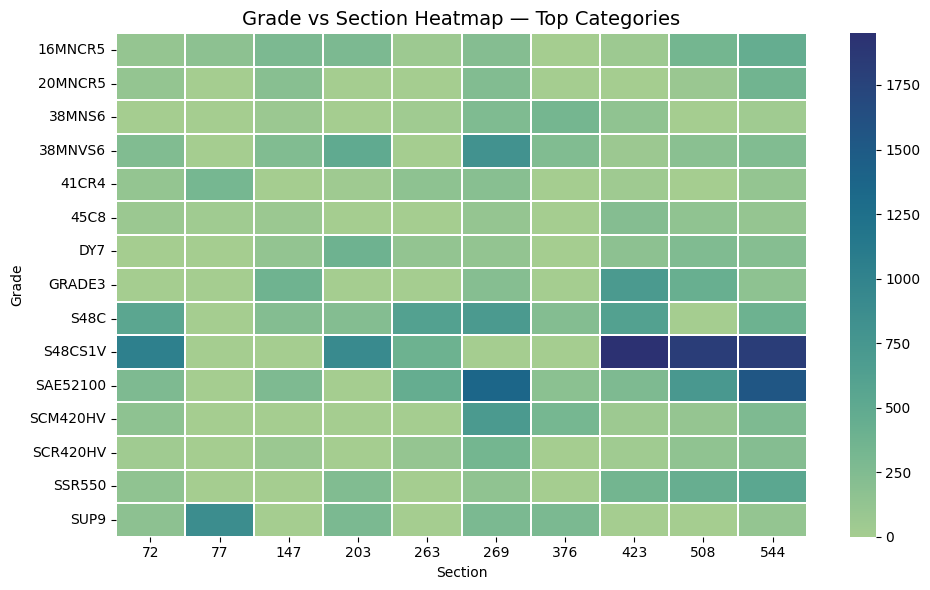

In [46]:

# Grade vs Section — Heatmap (Categorical Relationship)

# Use only top 15 grades & top 10 sections for clarity
top_grades = merged_df['GRADE'].value_counts().nlargest(15).index
top_sections = merged_df['SECTION'].value_counts().nlargest(10).index

subset_df = merged_df[
    (merged_df['GRADE'].isin(top_grades)) &
    (merged_df['SECTION'].isin(top_sections))
]

grade_section = pd.crosstab(subset_df['GRADE'], subset_df['SECTION'])

plt.figure(figsize=(10,6))
sns.heatmap(grade_section, cmap='crest', cbar=True, linewidths=0.3)
plt.title("Grade vs Section Heatmap — Top Categories", fontsize=14)
plt.xlabel("Section")
plt.ylabel("Grade")
plt.tight_layout()
plt.show()
